In [2]:
%matplotlib inline
import warnings
warnings. filterwarnings("ignore")
import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn. feature_extraction. text import TfidfTransformer
from sklearn. feature_extraction. text import TfidfVectorizer
from sklearn. feature_extraction. text import CountVectorizer
from sklearn. metrics import confusion_matrix
from sklearn import metrics
from sklearn. metrics import roc_curve, auc
from nltk. stem. porter import PorterStemmer
import re
import string
from nltk. corpus import stopwords
from nltk. stem import PorterStemmer
from nltk. stem. wordnet import WordNetLemmatizer
from gensim. models import Word2Vec
from gensim. models import KeyedVectors
import pickle
import scipy as sp
from tqdm import tqdm
import os
from sklearn. cross_validation import train_test_split
from sklearn. neighbors import KNeighborsClassifier
from sklearn. metrics import accuracy_score
from sklearn. cross_validation import cross_val_score
from collections import Counter
from sklearn. metrics import accuracy_score
from sklearn import cross_validation
from sklearn. metrics import confusion_matrix
from sklearn. preprocessing import normalize
from sklearn import datasets, neighbors
from sklearn. metrics import roc_auc_score
from sklearn. preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC

C:\Anaconda3\lib\site-packages\gensim\utils.py:860: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")
C:\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# [0] <font color='red'>Load Data

In [3]:
from scipy.sparse import load_npz

path = "C:/Python/Assignments/Preprocessing/"

def opn(name):
    with open(path + name , "rb") as file:
        return pickle.load(file)

train_bow = load_npz(path + "train_bow.npz")
test_bow = load_npz(path + "test_bow.npz")
cv_bow = load_npz(path + "cv_bow.npz")

train_tfidf = load_npz(path + "train_tfidf.npz")
test_tfidf = load_npz(path + "test_tfidf.npz")
cv_tfidf = load_npz(path + "cv_tfidf.npz")

with open(path +"X_test.txt", "rb") as file:
    X_test = pickle.load(file)
with open(path +"X_train.txt", "rb") as file:
    X_train = pickle.load(file)
with open(path +"X_cv.txt", "rb") as file:
    X_cv = pickle.load(file)
    
with open(path +"Y_test.txt", "rb") as file:
    Y_test = pickle.load(file)
with open(path +"Y_train.txt", "rb") as file:
    Y_train = pickle.load(file)
with open(path +"Y_cv.txt", "rb") as file:
    Y_cv = pickle.load(file)

with open(path + "X_cv_sum.txt", "rb") as file:
    X_cv_sum = pickle.load(file)
with open(path + "X_train_sum.txt", "rb") as file:
    X_train_sum = pickle.load(file)
with open(path + "X_test_sum.txt", "rb") as file:
    X_test_sum = pickle.load(file)

with open(path + "train_avgw2v.txt", "rb") as file:
    train_avgw2v = pickle.load(file)
with open(path + "cv_avgw2v.txt", "rb") as file:
    cv_avgw2v = pickle.load(file)
with open(path + "test_avgw2v.txt", "rb") as file:
    test_avgw2v = pickle.load(file)

with open(path + "train_tfw2v.txt", "rb") as file:
    train_tfw2v = pickle.load(file)
with open(path + "cv_tfw2v.txt", "rb") as file:
    cv_tfw2v = pickle.load(file)
with open(path + "test_tfw2v.txt", "rb") as file:
    test_tfw2v = pickle.load(file)
    

# [5] Assignment 7: SVM

<ol>
    <li><strong>Apply SVM on these feature sets</strong>
        <ul>
            <li><font color='red'>SET 1:</font>Review text, preprocessed one converted into vectors using (BOW)</li>
            <li><font color='red'>SET 2:</font>Review text, preprocessed one converted into vectors using (TFIDF)</li>
            <li><font color='red'>SET 3:</font>Review text, preprocessed one converted into vectors using (AVG W2v)</li>
            <li><font color='red'>SET 4:</font>Review text, preprocessed one converted into vectors using (TFIDF W2v)</li>
        </ul>
    </li>
    <br>
    <li><strong>Procedure</strong>
        <ul>
    <li>You need to work with 2 versions of SVM
        <ul><li>Linear kernel</li>
            <li>RBF kernel</li></ul>
    <li>When you are working with linear kernel, use SGDClassifier’ with hinge loss because it is computationally less expensive.</li>
    <li>When you are working with ‘SGDClassifier’ with hinge loss and trying to find the AUC
        score, you would have to use <a href='https://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html'>CalibratedClassifierCV</a></li>
    <li>Similarly, like kdtree of knn, when you are working with RBF kernel it's better to reduce
the number of dimensions. You can put min_df = 10, max_features = 500 and consider a sample size of 40k points.</li>                
        </ul>
    </li>
    <br>
    <li><strong>Hyper paramter tuning (find best alpha in range [10^-4 to 10^4], and the best penalty among 'l1', 'l2')</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>Find the best hyper paramter using k-fold cross validation or simple cross validation data</li>
    <li>Use gridsearch cv or randomsearch cv or you can also write your own for loops to do this task of hyperparameter tuning</li>          
        </ul>
    </li>
    <br>
    <li><strong>Feature importance</strong>
        <ul>
    <li>When you are working on the linear kernel with BOW or TFIDF please print the top 10 best
features for each of the positive and negative classes.</li>
        </ul>
    </li>
    <br>
    <li><strong>Feature engineering</strong>
        <ul>
    <li>To increase the performance of your model, you can also experiment with with feature engineering like :</li>
            <ul>
            <li>Taking length of reviews as another feature.</li>
            <li>Considering some features from review summary as well.</li>
        </ul>
        </ul>
    </li>
    <br>
    <li><strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure.
    <img src='train_cv_auc.JPG' width=300px></li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='train_test_auc.JPG' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points. Please visualize your confusion matrices using <a href='https://seaborn.pydata.org/generated/seaborn.heatmap.html'>seaborn heatmaps.
    <img src='confusion_matrix.png' width=300px></li>
        </ul>
    </li>
    <br>
    <li><strong>Conclusion</strong>
        <ul>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format. To print out a table please refer to this prettytable library<a href='http://zetcode.com/python/prettytable/'>  link</a> 
        <img src='summary.JPG' width=400px>
    </li>
        </ul>
</ol>

<h4><font color='red'>Note: Data Leakage</font></h4>

1. There will be an issue of data-leakage if you vectorize the entire data and then split it into train/cv/test.
2. To avoid the issue of data-leakag, make sure to split your data first and then vectorize it. 
3. While vectorizing your data, apply the method fit_transform() on you train data, and apply the method transform() on cv/test data.
4. For more details please go through this <a href='https://soundcloud.com/applied-ai-course/leakage-bow-and-tfidf'>link.</a>

# Applying SVM

In [35]:
def svm(train1,test1,cv1):

    sc = StandardScaler(with_mean=False)
    train = sc.fit_transform(train1)    
    cv = sc.fit_transform(cv1)
    test = sc.transform(test1)
    
    Alpha = [10**-4,10**-3,10**-2,10**-1,1,10,10**2,10**3,10**4]
    Penal = ['l1','l2']
    parameter = {'alpha':Alpha, 'penalty':Penal}
    
    clf = GridSearchCV(SGDClassifier(),parameter,verbose=1,scoring='roc_auc')
    clf.fit(train,Y_train)
    alpha_opt, penalty_opt = clf.best_params_.get('alpha'), clf.best_params_.get('penalty')
   
    train_score = clf.cv_results_.get('mean_train_score')
    test_score = clf.cv_results_.get('mean_test_score')
    x2 = np.arange(len(Alpha))
    plt.plot(x2,train_score[::2],'r', label = 'Train Data(l1)')
    plt.plot(x2,test_score[::2],'b', label = 'CV Data(l1)')

    plt.plot(x2,train_score[1::2],'r--', label = 'Train Data(l2)')
    plt.plot(x2,test_score[1::2],'b--', label = 'CV Data(l2)')
    plt.xticks(x2, Alpha)
    plt.ylim(0,1)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.grid(True)
    plt.title("AUC Values for Train and CV Data with penalty\n")
    plt.xlabel("Hyper Parameter(alpha)")
    plt.ylabel("AUC Value")
    plt.show()
    
    
    
    print("The optimal value of Alpha = ", alpha_opt , " And Optimal Penalty is : ", penalty_opt)
    
    SGD = SGDClassifier(penalty=penalty_opt,alpha=alpha_opt)
    SGD.fit(train,Y_train)
    
    # Since decision function gives probability values
    fpr, tpr, threshold = roc_curve(Y_train, SGD.decision_function(train) )
    fpr1, tpr1, threshold1 = roc_curve(Y_test, SGD.decision_function(test) )
    pred = SGD.predict(test)
    print("The AUC value for test data is ",roc_auc_score( Y_test, SGD.decision_function(test)))

    plt.plot(fpr,tpr,'r', label = 'Train Data')
    plt.plot(fpr1,tpr1,'b', label = 'Test Data')
    plt.ylim(0,1)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.grid(True)
    plt.title("ROC Curve for Train and Test Data\n")
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.show()

    #Confusion Matrix
    cm = confusion_matrix(Y_test,pred)
    tn, fp, fn, tp = cm.ravel()

    # https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
    # Code for drawing seaborn heatmaps
    class_names = ['0','1']
    df_heatmap = pd.DataFrame(cm, index=class_names, columns=class_names )
    fig = plt.figure(figsize=(5,3))
    heatmap = sns.heatmap(df_heatmap, annot=True, fmt="d")

    # Setting tick labels for heatmap
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
    plt.ylabel('True label',size=18)
    plt.xlabel('Predict label',size=18)
    plt.title("Confusion Matrix\n",size=24)
    plt.show()

## [5.1] Linear SVM

### [5.1.1] Applying Linear SVM on BOW,<font color='red'> SET 1</font>

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConv

Fitting 3 folds for each of 18 candidates, totalling 54 fits


[Parallel(n_jobs=1)]: Done  54 out of  54 | elapsed:    7.0s finished


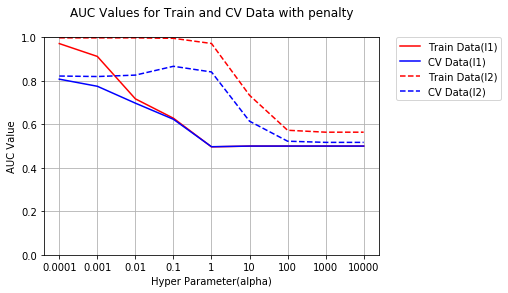

The optimal value of Alpha =  0.1  And Optimal Penalty is :  l2
The AUC value for test data is  0.878771133089216


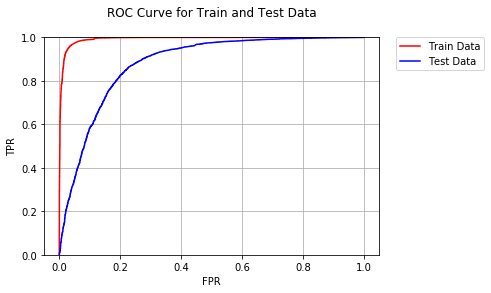

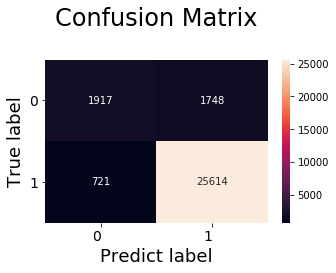

In [36]:
svm(train_bow,test_bow,cv_bow)

### [5.1.2] Feature Importance on BOW,<font color='red'> SET 1</font>

In [37]:
sgd = SGDClassifier(penalty='l2',alpha=0.1)
sgd.fit(train_bow, Y_train)
feat_log = sgd.coef_

count_vect = CountVectorizer()
p = count_vect.fit_transform(X_train)
p = pd.DataFrame(feat_log.T,columns=['+ve'])
p['feature'] = count_vect.get_feature_names()

q = p.sort_values(by = '+ve',kind = 'quicksort',ascending= False)
print("Top 10  important features of positive class", np.array(q['feature'][:10]))

Top 10  important features of positive class ['great' 'love' 'best' 'good' 'delicious' 'loves' 'find' 'excellent'
 'favorite' 'wonderful']


In [36]:
# Please write all the code with proper documentation
print("Top 10  important features of negative class",np.array(q.tail(10)['feature']))

Top 10  important features of negative class ['awful' 'waste' 'horrible' 'thought' 'maybe' 'would' 'not' 'disappointed'
 'bad' 'money']


### [5.1.2] Applying Linear SVM on TFIDF,<font color='red'> SET 2</font>

Fitting 3 folds for each of 18 candidates, totalling 54 fits


[Parallel(n_jobs=1)]: Done  54 out of  54 | elapsed:    8.6s finished


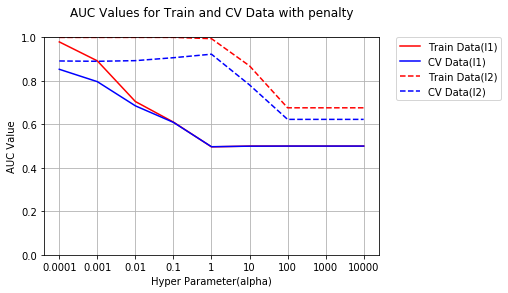

The optimal value of Alpha =  1  And Optimal Penalty is :  l2
The AUC value for test data is  0.919065420851237


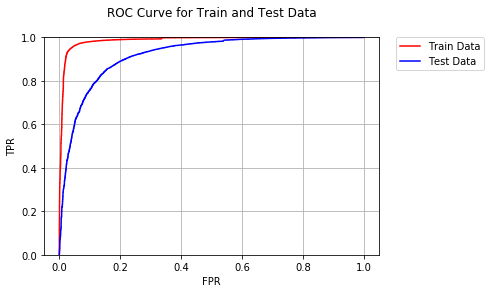

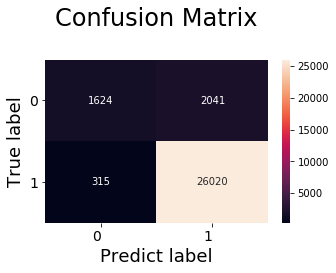

In [37]:
# Please write all the code with proper documentation
svm(train_tfidf,test_tfidf,cv_tfidf)

### [5.1.3] Feature Importance on TFIDF,<font color='red'> SET 2</font>

In [41]:
sgd = SGDClassifier(penalty='l2',alpha=0.1)
sgd.fit(train_tfidf,Y_train)
feat_log = sgd.coef_

tf_idf_vect = TfidfVectorizer(ngram_range=(1,2), min_df=10)
p = tf_idf_vect.fit_transform(X_train)
p = pd.DataFrame(feat_log.T,columns=['+ve'])
p['feature'] = tf_idf_vect.get_feature_names()


q = p.sort_values(by = '+ve',kind = 'quicksort',ascending= False)
print("Top 10  important features of positive class", np.array(q['feature'][:10]))

Top 10  important features of positive class ['not' 'great' 'good' 'tea' 'love' 'like' 'coffee' 'best' 'one' 'flavor']


In [42]:
# Please write all the code with proper documentation
print("Top 10  important features of negative class",np.array(q.tail(10)['feature']))

Top 10  important features of negative class ['refund' 'not buy' 'return' 'terrible' 'horrible' 'awful' 'threw'
 'not worth' 'waste money' 'worst']


### [5.1.3]  Applying Linear SVM on AVG W2V,<font color='red'> SET 3</font>

Fitting 3 folds for each of 18 candidates, totalling 54 fits


[Parallel(n_jobs=1)]: Done  54 out of  54 | elapsed:    6.5s finished


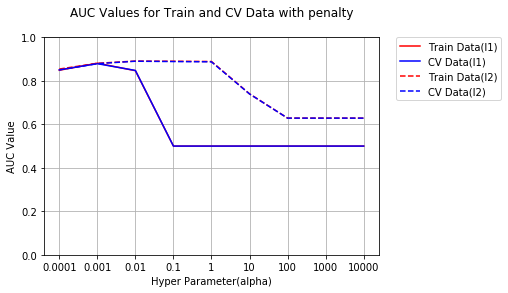

The optimal value of Alpha =  0.01  And Optimal Penalty is :  l2
The AUC value for test data is  0.8864525886553021


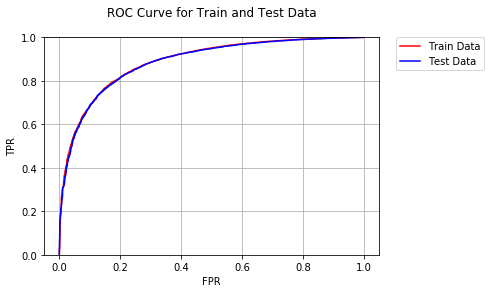

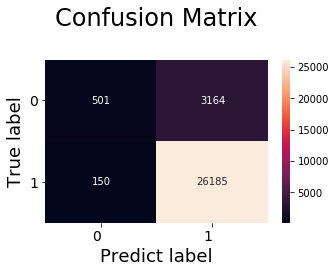

In [38]:
# Please write all the code with proper documentation
svm(train_avgw2v,test_avgw2v,cv_avgw2v)

### [5.1.4]  Applying Linear SVM on TFIDF W2V,<font color='red'> SET 4</font>

Fitting 3 folds for each of 18 candidates, totalling 54 fits


[Parallel(n_jobs=1)]: Done  54 out of  54 | elapsed:    6.6s finished


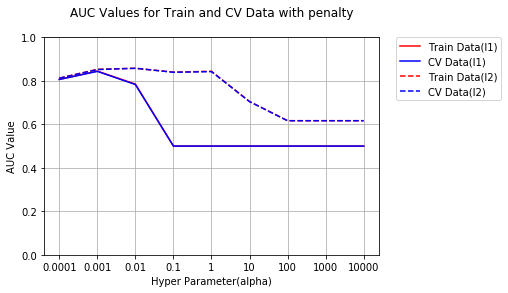

The optimal value of Alpha =  0.01  And Optimal Penalty is :  l2
The AUC value for test data is  0.8547442116231959


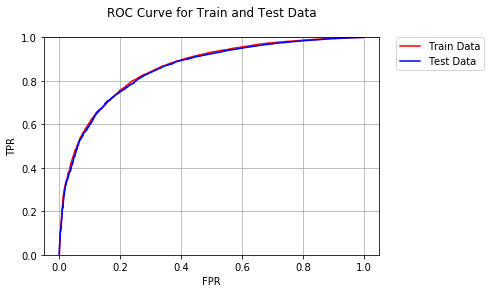

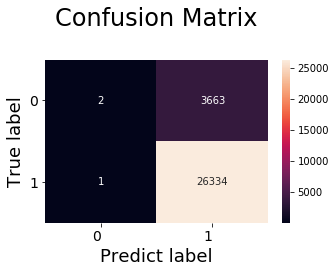

In [39]:
# Please write all the code with proper documentation
svm(train_tfw2v,test_tfw2v,cv_tfw2v)

## [5.2] RBF SVM

### <font color='red'> Loading already saved sorted data, so that i don't have to do it agin

In [40]:
with open("final_sorted.txt", "rb") as file:
    sorted_data = pickle.load(file)
my_final = sorted_data[:20000]
from sklearn.model_selection import train_test_split

x = my_final['Text_new'].values
y = my_final['Score']

# split the data set into train and test
X_1, X_test, y_1, Y_test = cross_validation.train_test_split(x, y, test_size=0.3, random_state=0)

# split the train data set into cross validation train and cross validation test
X_train, X_cv, Y_train, Y_cv = cross_validation.train_test_split(X_1, y_1, test_size=0.3,random_state=0)

In [41]:
def svm_rbf(train1,test1,cv1):

    sc = StandardScaler(with_mean=False)
    train = sc.fit_transform(train1)    
    cv = sc.fit_transform(cv1)
    test = sc.transform(test1)
    a = [10**-4,10**-3,10**-2,10**-1,1,10,10**2,10**3,10**4]
    
    parameter = {'C':a}
    
    clf = GridSearchCV(SVC(),parameter,verbose=1,scoring='roc_auc')
    clf.fit(train,Y_train)
    opt = clf.best_params_.get('C')
    
    
    train_score = clf.cv_results_.get('mean_train_score')
    test_score = clf.cv_results_.get('mean_test_score')
    x2 = np.arange(len(Alpha))
    plt.plot(x2,train_score,'r', label = 'Train Data')
    plt.plot(x2,test_score,'b', label = 'CV Data')
    plt.xticks(x2, Alpha)
    plt.ylim(0,1)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.grid(True)
    plt.title("AUC Values for Train and CV Data with penalty\n")
    plt.xlabel("Hyper Parameter(C)")
    plt.ylabel("AUC Value")
    plt.show()
    
    
    print("The optimal value of C = ", opt)

    SGD = SVC(probability= True,C = opt)
    SGD.fit(train,Y_train)

    # Since decision function gives probability values
    fpr, tpr, threshold = roc_curve(Y_train, SGD.decision_function(train) )
    fpr1, tpr1, threshold1 = roc_curve(Y_test, SGD.decision_function(test) )
    pred = SGD.predict(test)
    print("The AUC value for test data is ",roc_auc_score( Y_test, SGD.decision_function(test)))

    plt.plot(fpr,tpr,'r', label = 'Train Data')
    plt.plot(fpr1,tpr1,'b', label = 'Test Data')
    plt.ylim(0,1)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.grid(True)
    plt.title("ROC Curve for Train and Test Data\n")
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.show()

    #Confusion Matrix
    cm = confusion_matrix(Y_test,pred)
    tn, fp, fn, tp = cm.ravel()

    # https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
    # Code for drawing seaborn heatmaps
    class_names = ['0','1']
    df_heatmap = pd.DataFrame(cm, index=class_names, columns=class_names )
    fig = plt.figure(figsize=(5,3))
    heatmap = sns.heatmap(df_heatmap, annot=True, fmt="d")

    # Setting tick labels for heatmap
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
    plt.ylabel('True label',size=18)
    plt.xlabel('Predict label',size=18)
    plt.title("Confusion Matrix\n",size=24)
    plt.show()

### [5.2.1] Applying RBF SVM on BOW,<font color='red'> SET 1</font>

In [42]:
# Please write all the code with proper documentation
count_vect = CountVectorizer(min_df=10, max_features=500)  #in scikit-learn
s5_train_vec = count_vect.fit_transform(X_train)
s5_test_vec = count_vect.transform(X_test)
s5_cv_vec = count_vect.transform(X_cv)

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConv

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:  3.9min finished


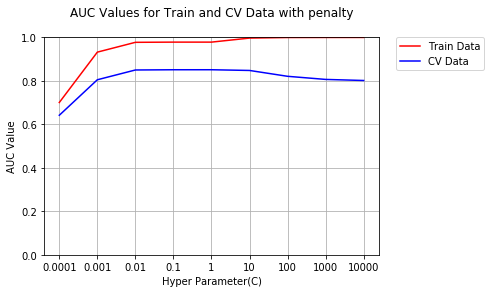

The optimal value of C =  1
The AUC value for test data is  0.8661618937390484


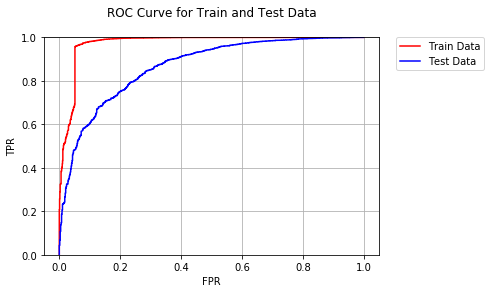

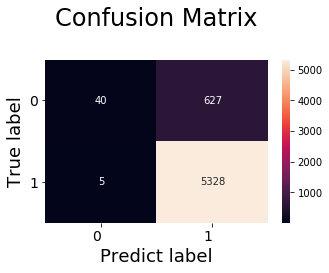

In [43]:
svm_rbf(s5_train_vec, s5_test_vec, s5_cv_vec)

### [5.2.2] Applying RBF SVM on TFIDF,<font color='red'> SET 2</font>

In [44]:
# Please write all the code with proper documentation
# Please write all the code with proper documentation

tf_idf_vect = TfidfVectorizer(ngram_range=(1,2), min_df=10,  max_features=500)

final_tf_idf = tf_idf_vect.fit_transform(X_train)

s6_train_vec = tf_idf_vect.fit_transform(X_train)
s6_test_vec = tf_idf_vect.transform(X_test)
s6_cv_vec = tf_idf_vect.transform(X_cv)
print("the number of unique words including both unigrams and bigrams ", s6_train_vec.get_shape()[1])


the number of unique words including both unigrams and bigrams  500


Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:  5.2min finished


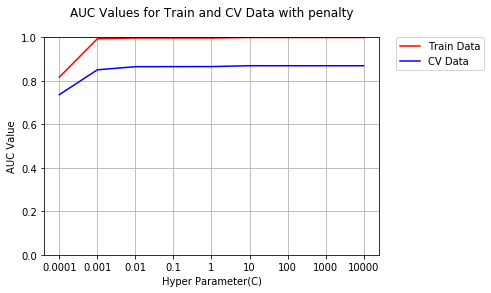

The optimal value of C =  10
The AUC value for test data is  0.8803574023976198


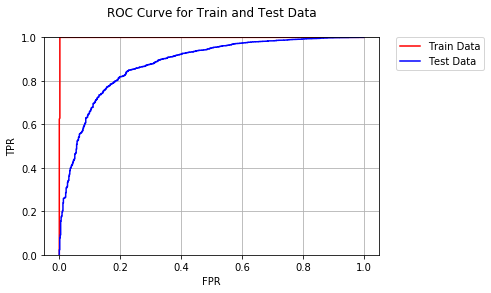

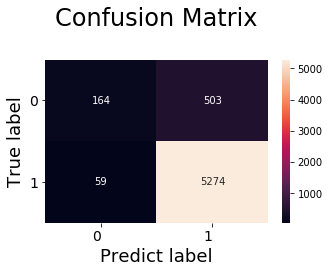

In [45]:
svm_rbf(s6_train_vec, s6_test_vec, s6_cv_vec)

### [5.2.3]  Applying RBF SVM on AVG W2V,<font color='red'> SET 3</font>

In [46]:
# Train your own Word2Vec model using your own text corpus
i=0
list_of_sentance=[]
for sentance in X_train:
    list_of_sentance.append(sentance.split())

 # min_count = 5 considers only words that occured atleast 5 times
w2v_model=Word2Vec(list_of_sentance,min_count=5,size=50, workers=4)

w2v_words = list(w2v_model.wv.vocab)
print("number of words that occured minimum 5 times ",len(w2v_words))
def avgwtv(X_test):
    '''
    returns average woed2vec
    '''
    i=0
    list_of_sentance=[]
    for sentance in X_test:
        list_of_sentance.append(sentance.split())
    test_vectors = []; # the avg-w2v for each sentence/review is stored in this list
    for sent in tqdm(list_of_sentance): # for each review/sentence
        sent_vec = np.zeros(50) # as word vectors are of zero length 50, you might need to change this to 300 if you use google's w2v
        cnt_words =0; # num of words with a valid vector in the sentence/review
        for word in sent: # for each word in a review/sentence
            if word in w2v_words:
                vec = w2v_model.wv[word]
                sent_vec += vec
                cnt_words += 1
        if cnt_words != 0:
            sent_vec /= cnt_words
        test_vectors.append(sent_vec)
    return test_vectors

number of words that occured minimum 5 times  6034


In [47]:
s3_train_vectors = avgwtv(X_train)
s3_cv_vectors = avgwtv(X_cv)
s3_test_vectors = avgwtv(X_test)

100%|█████████████████████████████████████| 6000/6000 [00:08<00:00, 673.73it/s]


Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:  2.4min finished


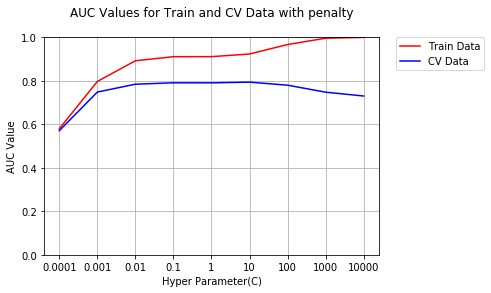

The optimal value of C =  10
The AUC value for test data is  0.8037712345777234


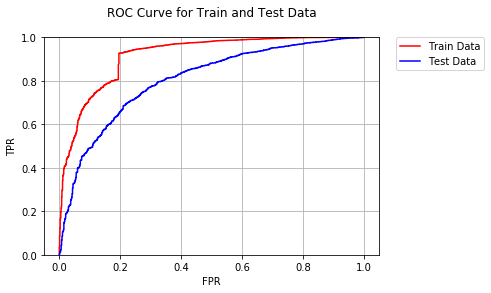

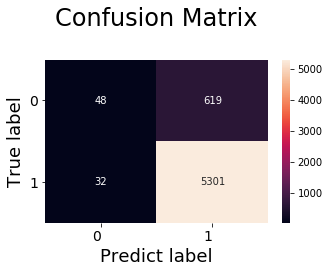

In [48]:
svm_rbf(s3_train_vectors, s3_test_vectors, s3_cv_vectors)

### [5.2.4]  Applying RBF SVM on TFIDF W2V,<font color='red'> SET 4</font>

In [49]:
# Please write all the code with proper documentation
# Please write all the code with proper documentation
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
model = TfidfVectorizer()
model.fit(X_train)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(model.get_feature_names(), list(model.idf_)))

# TF-IDF weighted Word2Vec
tfidf_feat = model.get_feature_names() # tfidf words/col-names
# final_tf_idf is the sparse matrix with row= sentence, col=word and cell_val = tfidf

#standardized_weight_w2v = StandardScaler().fit_transform(tfidf_sent_vectors)
#print(standardized_weight_w2v.shape)
def tfidfw2v(test):
    '''
    Returns tfidf word2vec
    '''
    tfidf_sent_vectors = []; # the tfidf-w2v for each sentence/review is stored in this list
    i=0
    list_of_sentance=[]
    for sentance in test:
        list_of_sentance.append(sentance.split())
        
    for sent in tqdm(list_of_sentance): # for each review/sentence 
        sent_vec = np.zeros(50) # as word vectors are of zero length
        weight_sum =0; # num of words with a valid vector in the sentence/review
        for word in sent: # for each word in a review/sentence
            if word in w2v_words and word in tfidf_feat:
                vec = w2v_model.wv[word]
                tf_idf = dictionary[word]*(sent.count(word)/len(sent))
                sent_vec += (vec * tf_idf)
                weight_sum += tf_idf
        if weight_sum != 0:
            sent_vec /= weight_sum
        tfidf_sent_vectors.append(sent_vec)
     
    return tfidf_sent_vectors
        

In [50]:
s4_train_vectors1 = tfidfw2v(X_train)
s4_cv_vectors1 = tfidfw2v(X_cv)
s4_test_vectors1 = tfidfw2v(X_test)

100%|██████████████████████████████████████| 6000/6000 [01:01<00:00, 96.84it/s]


Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:  2.8min finished


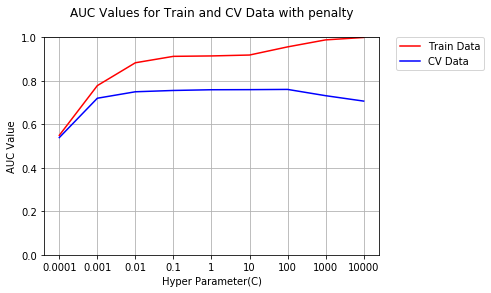

The optimal value of C =  100
The AUC value for test data is  0.7702257534274304


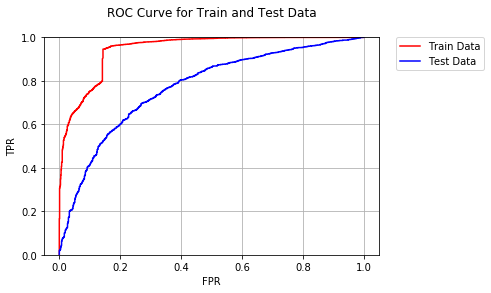

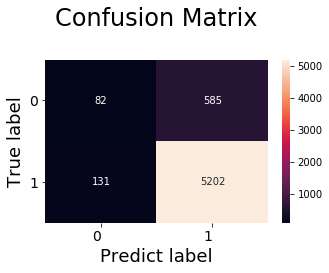

In [51]:
svm_rbf(s4_train_vectors1, s4_test_vectors1, s4_cv_vectors1)

# [6] Conclusions

In [43]:

# Please compare all your models using Prettytable library
from prettytable import from_csv
with open("table.csv", "r") as fp: 
    x = from_csv(fp)
    
print(x)

+------------+---------------+-----------------+---------+------+
| Vectorizer | Regulariztion | Hyper Parameter | Penalty | AUC  |
+------------+---------------+-----------------+---------+------+
|    BOW     |   Linear SVM  |       0.1       |    l2   | 0.74 |
|   TFIDF    |   Linear SVM  |        1        |    l2   | 0.72 |
|  AVG W2V   |   Linear SVM  |       0.01      |    l2   | 0.6  |
| TFIDF W2V  |   Linear SVM  |       0.01      |    l2   | 0.5  |
|    BOW     |    RBF SVM    |        1        |    -    | 0.53 |
|   TFIDF    |    RBF SVM    |        10       |    -    | 0.62 |
|  AVG W2V   |    RBF SVM    |        10       |    -    | 0.53 |
| TFIDF W2V  |    RBF SVM    |       100       |    -    | 0.56 |
+------------+---------------+-----------------+---------+------+


1. Linear kernel is faster than RBF Kernel with less training time.
2. BOW featurisation with Linear kernel and  L2 regularization gave almost 74% AUC value.
3. We can further improve the model by taking more data points, and by taking some other features that may provide us with better insight about the data.
4. And the previous model we have applied have given better results than this. Hence SVM does not perform good with this dataset.